In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files

files.upload()
df = pd.read_csv("minute_data.csv")
df.head(5)

Saving minute_data.csv to minute_data.csv


,Unnamed: 0,count
0,0,3659
1,1,3465
2,2,3159
3,3,3128
4,4,3544


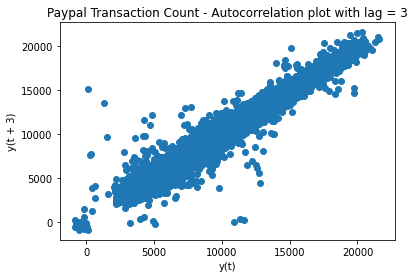

In [ ]:
plt.figure()
lag_plot(df['count'], lag=3)
plt.title('Paypal Transaction Count - Autocorrelation plot with lag = 3')
plt.show()

# can see a good auto-correlation in the data
#Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data. 

(pushing the same data set up by 3 data points) to see how the data correlates with each other


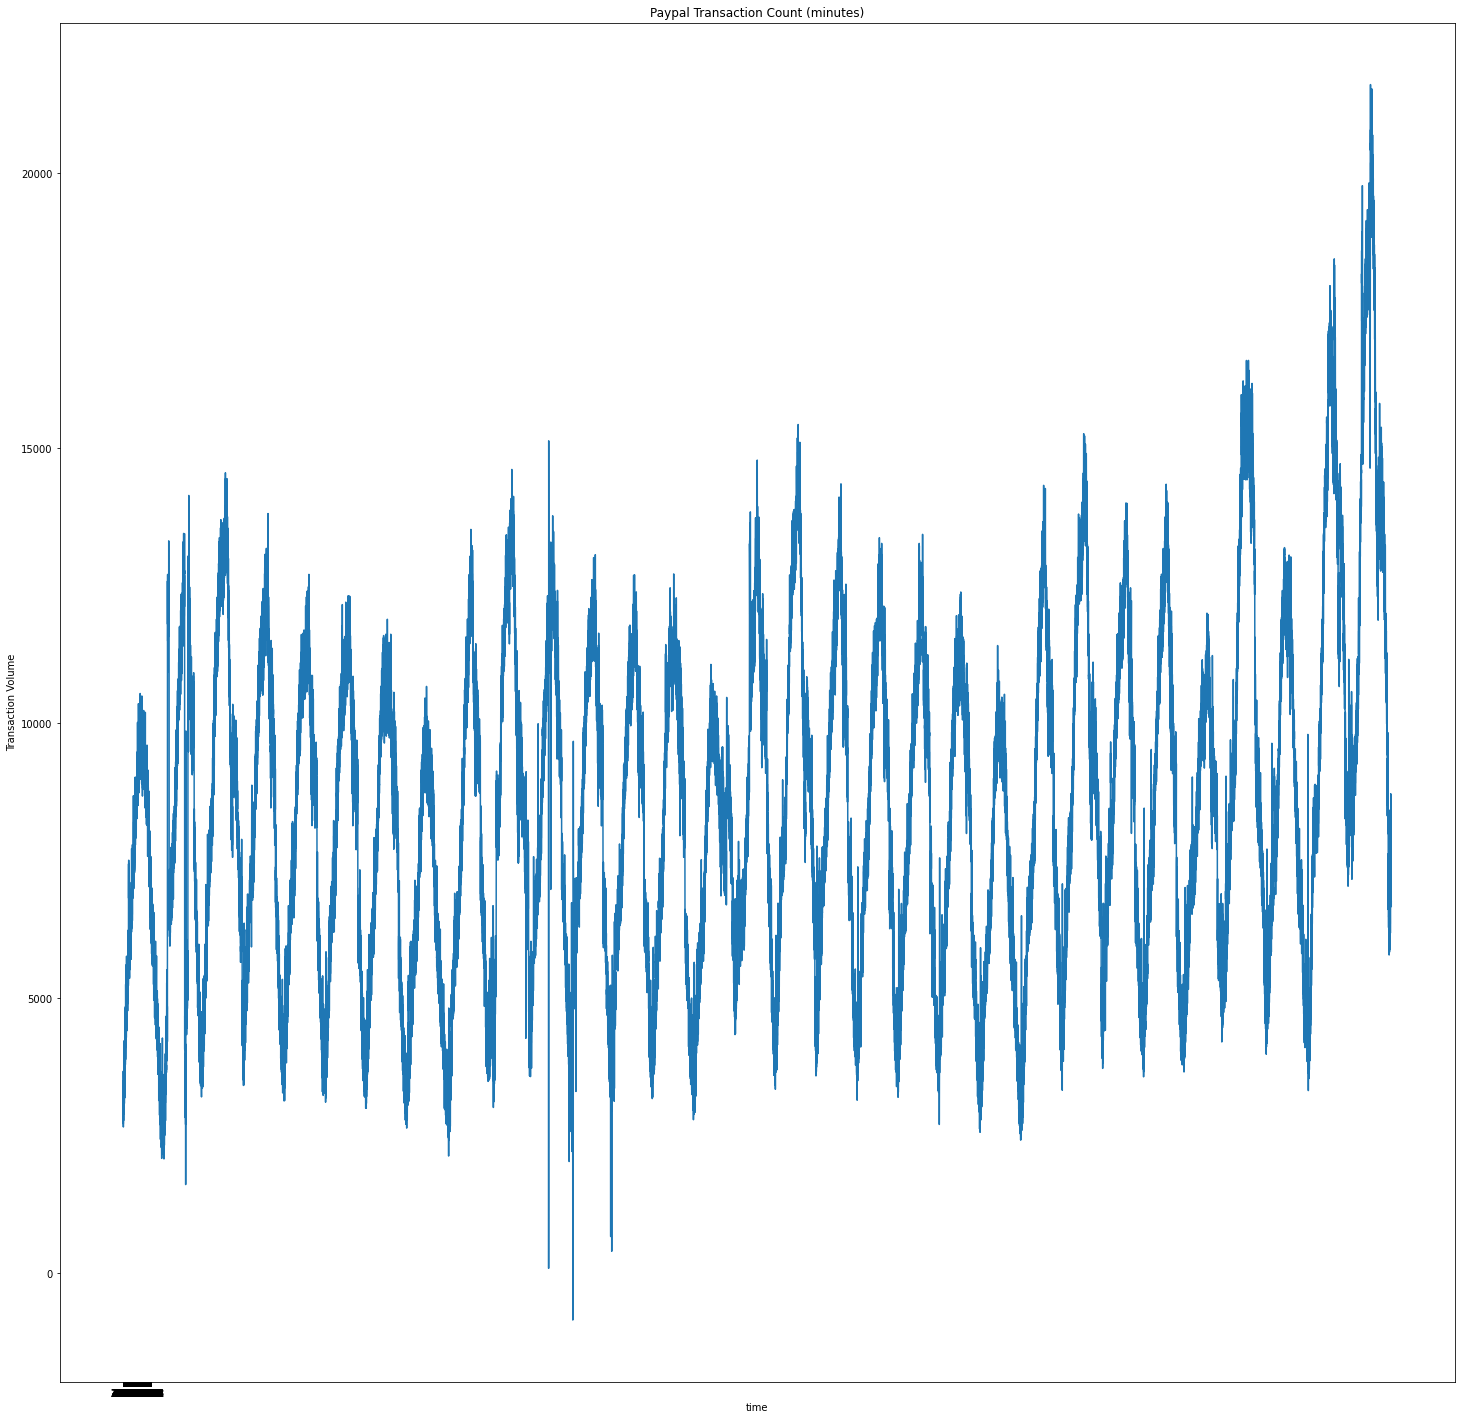

In [ ]:
# total points : 44639
plt.figure(figsize=(25, 25))
plt.plot(df["Unnamed: 0"], df["count"])
plt.xticks(np.arange(1,1000, 1), df['count'][1:1000:1])
plt.title("Paypal Transaction Count (minutes)")
plt.xlabel("time")
plt.ylabel("Transaction Volume")

plt.show()



*   p is the number of lag observations.

A â€œlagâ€ is a fixed amount of passing time; One set of observations in a time series is plotted (lagged) against a second, later set of data.
*   q is the size/width of the moving average window.
*   d is the degree of differencing.

Differencing of a time series in discrete time is the transformation of the series to a new time series where the values are the differences between consecutive values. This procedure may be applied consecutively more than once, giving rise to the "first differences", "second differences", etc.





In [ ]:
train_data, test_data = df[1:int((len(df)-43000)*0.7)], df[int((len(df)-43000)*0.7):2000]
training_data = train_data['count'].values
test_data = test_data['count'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 303560.9948620495


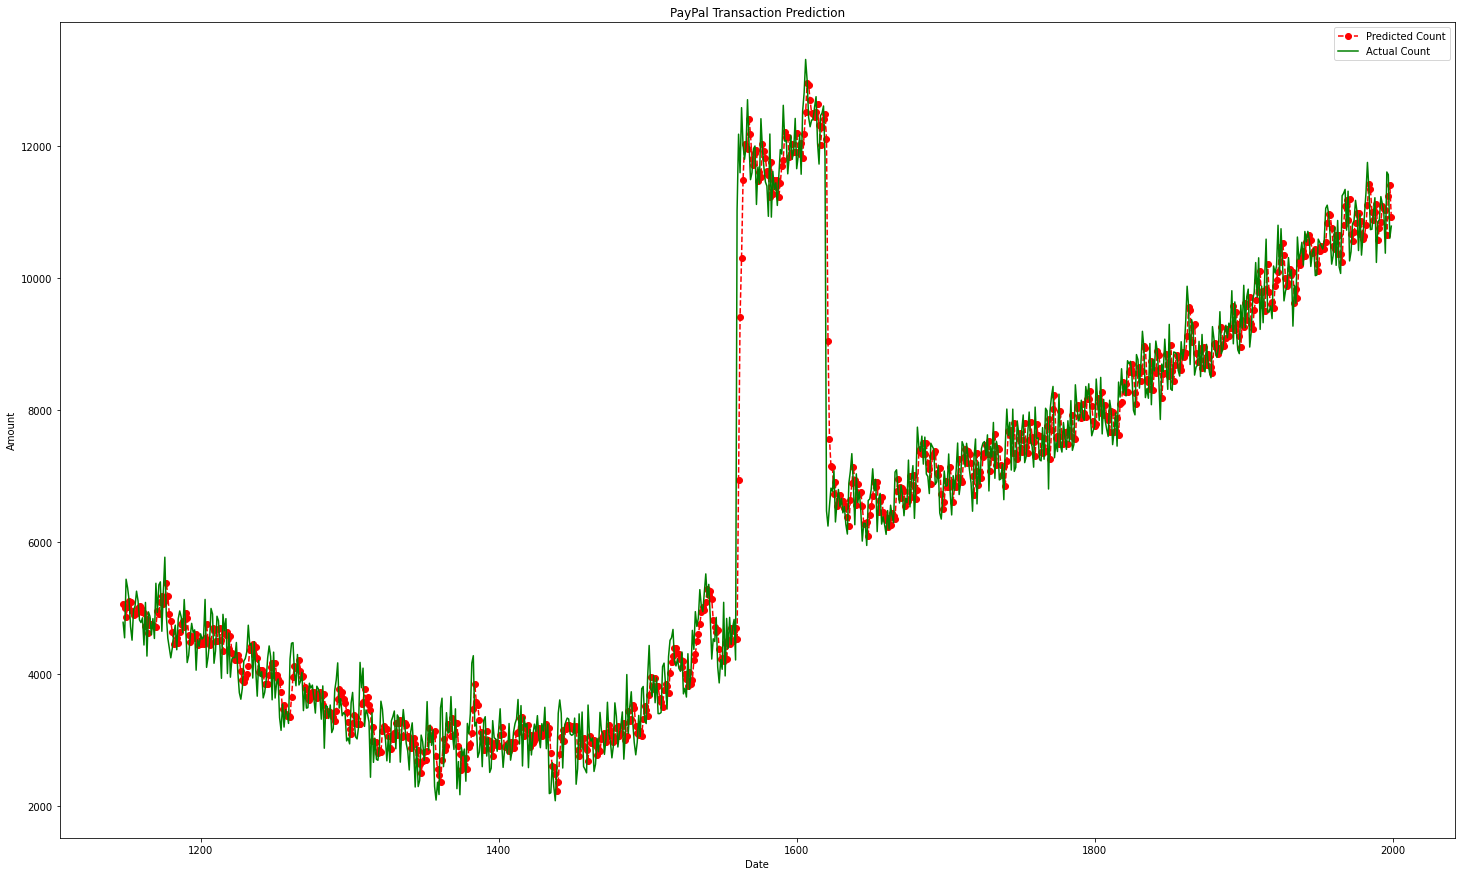

In [ ]:
test_set_range = df[int((len(df)-43000)*0.7):2000].index
plt.figure(figsize=(25, 15))
plt.plot(test_set_range, model_predictions, color='red', marker='o', linestyle='dashed',label='Predicted Count')
plt.plot(test_set_range, test_data, color='green', label='Actual Count')
plt.title('PayPal Transaction Prediction')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.legend()
plt.show()